# 🧩 3.3 – Closures y Decoradores

Los **closures** y **decoradores** son mecanismos que permiten encapsular comportamiento y añadir funcionalidades sin modificar el código original de una función. Este patrón es esencial en Python para escribir código más limpio y reutilizable.

---
## 🎯 Objetivos
- Comprender cómo funcionan los **closures** (funciones internas que recuerdan su entorno).
- Crear decoradores personalizados paso a paso.
- Aplicar decoradores con y sin parámetros.
- Encadenar varios decoradores sobre una misma función.

In [1]:
print('✅ Notebook 3.3 – Closures y Decoradores listo para practicar.')

✅ Notebook 3.3 – Closures y Decoradores listo para practicar.


---
## 1️⃣ ¿Qué es un Closure?

Un **closure** ocurre cuando una función interna **recuerda las variables del entorno donde fue creada**, aunque se ejecute fuera de él.

Esto permite crear funciones configuradas dinámicamente (funciones que generan funciones).

Un **closure** es una función interna que recuerda y puede seguir utilizando las variables del ámbito en el que fue creada, incluso después de que dicho ámbito haya terminado de ejecutarse. Aparece cuando:
- Tienes una función dentro de otra función
- La función interna usa variables de la interna
- La externa devuelve la función interna

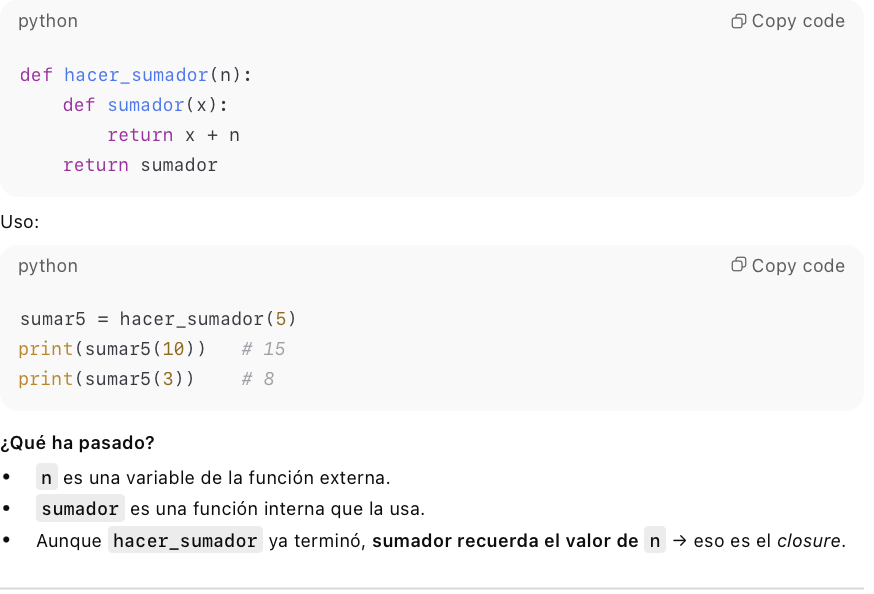

**¿Para qué sirve un closure?**

- Crear funciones personalizadas (sumar(5), sumar(10), etc.)
- Encapsular datos (como objetos pero más ligero)
- Evitar variables globales: permite almacenar estado sin ensuciar el espacio global del programa
- Programación funcional. Se utilizan mucho en funciones tipo:
    - Decoradores
    - Callbacks
    - Funciones de orden superior

In [2]:
def crear_multiplicador(factor):
    def multiplicar(x):
        return x * factor
    return multiplicar

por_dos = crear_multiplicador(2)
por_tres = crear_multiplicador(3)

print(por_dos(10))
print(por_tres(10))

20
30


✅ La función `multiplicar` recuerda el valor de `factor` incluso después de que `crear_multiplicador` haya terminado su ejecución.

---
## 2️⃣ Ejercicio 1 — Crear un closure contador

Crea una función `crear_contador()` que devuelva otra función llamada `incrementar()`.
Cada vez que se llame a `incrementar()`, debe sumar 1 al contador y devolver el valor actualizado.

💡 *Pista:* usa una variable local en `crear_contador()` y la palabra clave `nonlocal` dentro de `incrementar()`.

In [3]:
# Escribe aquí tu código...

def crear_contador():
    contador = 0
    def incrementar():
        nonlocal contador
        contador += 1
        return contador
    return incrementar

In [4]:
contador = crear_contador()
print(contador())

1


### ✅ Solución propuesta

In [5]:
def crear_contador():
    cuenta = 0 # enclosing. Variable local dentro de crear_contador()
    def incrementar(): # incrementar() es un closure
        nonlocal cuenta # indica que, cuando dentro de incrementar nos refiramos a cuenta, nos estamos refiriendo a
        # la variable "cuenta" de la función "crear_contador()"
        cuenta += 1 # incrementa en 1 la variable "cuenta" de "crear_contador()"
        return cuenta # devuelve el nuevo valor de cuenta
    return incrementar # devuelve "incrementar()", no su resultado. Devuelve una función que recuerda la variable "cuenta"

contador = crear_contador() # contador ahora es una función (closure) que mantiene su propio estado "cuenta"
print(contador())
print(contador())
print(contador())

# la variable "cuenta" no desaparece cuando termina la función. La función "contador()" es un closure y recuerda el
# valor de "cuenta" entre llamadas.

1
2
3


✅ Este patrón es útil para mantener **estado interno** sin usar variables globales ni crear clases innecesarias.

**NOTA**: Crear variables globales es una mala práctica. Es feo, poco seguro y rompe encapsulación.

Haciendo closure, la variable queda privada, nadie puede modificarla desde fuera y se mantiene el estado sin contaminar el espacio global.

---
## 3️⃣ Decoradores: funciones que modifican funciones

Un **decorador** es una función que recibe otra función y devuelve una versión modificada de ella.

Permite añadir comportamiento (por ejemplo, logs, validaciones, medición de tiempo, etc.) sin alterar la definición original.

In [6]:
def logger(func):
    def envoltura(*args, **kwargs):
        print(f'📘 Ejecutando {func.__name__} con args={args}, kwargs={kwargs}')
        resultado = func(*args, **kwargs)
        print(f'✅ Resultado: {resultado}')
        return resultado
    return envoltura

@logger
def sumar(a, b):
    return a + b

valor = sumar(5, 7)
print(valor)

📘 Ejecutando sumar con args=(5, 7), kwargs={}
✅ Resultado: 12
12


✅ El símbolo `@logger` aplica el decorador directamente sobre la función. Equivale a `sumar = logger(sumar)`.

---
## 4️⃣ Ejercicio 2 — Medir tiempo de ejecución

Crea un decorador `medir_tiempo(func)` que:
- Imprima cuánto tarda en ejecutarse una función.
- Devuelva el resultado original.

💡 *Pista:* usa `time.time()` antes y después de ejecutar la función decorada.

In [7]:
import time

def medir_tiempo(func):
    def envoltura():
        inicio = time.time()
        resultado = func()
        fin = time.time()
        print("Tiempo transcurrido", str(fin - inicio))
        return resultado
    return envoltura

In [8]:
# Primera forma de aplicar decorador
@medir_tiempo
def saludar():
    return "Hola!"

print(saludar())

Tiempo transcurrido 4.76837158203125e-07
Hola!


In [9]:
# Segunda forma de aplicar decorador
saludar_con_tiempo = medir_tiempo(saludar)
print(saludar_con_tiempo())

Tiempo transcurrido 1.1920928955078125e-06
Tiempo transcurrido 0.0009164810180664062
Hola!


**NOTA: aparecen dos tiempos porque la propia función saludar() ya está creada con el decorador medir_tiempo**

In [10]:
# Escribe aquí tu código...

import time

def medir_tiempo(func):
    def envoltura():
        inicio = time.time()
        resultado = func()
        fin = time.time()
        print(f'⏱ Tiempo: {fin - inicio:.5f} segundos')
        return resultado

    return envoltura


@medir_tiempo
def unafuncion():
    print('soy una funcion')
    return 'soy el resultado de func'


@medir_tiempo
def otrafuncion():
    print('soy otra funcion')
    return 'soy el resultado de otra funcion'


@logger
@medir_tiempo
def tarea_pesada():
    suma = sum(range(1_000_000))
    return suma

print(unafuncion())
print(otrafuncion())
print(tarea_pesada())


soy una funcion
⏱ Tiempo: 0.00017 segundos
soy el resultado de func
soy otra funcion
⏱ Tiempo: 0.00001 segundos
soy el resultado de otra funcion
📘 Ejecutando envoltura con args=(), kwargs={}
⏱ Tiempo: 0.01530 segundos
✅ Resultado: 499999500000
499999500000


### ✅ Solución propuesta

In [11]:
import time

def medir_tiempo(func):
    def envoltura(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        print(f'⏱ Tiempo: {fin - inicio:.5f} segundos')
        return resultado
    return envoltura

@medir_tiempo
def tarea_pesada():
    suma = sum(range(1_000_000))
    return suma

tarea_pesada()

⏱ Tiempo: 0.01488 segundos


499999500000

✅ Este decorador es útil para **benchmarking** o detección de cuellos de botella en código.



## 4️⃣.1️⃣ - Ejemplo de aplicación de closures y decoradores

**Ejercicio 1.Decorador que imprime ejecución**

Crear un decorador `anunciar(func)` que imprima `Ejecutando{nombre_funcion}` antes de ejecutar la función



In [12]:
def anunciar(func):
    def envoltura():
        print(f"Ejecutando {func.__name__}...")
        return func()
    return envoltura

@anunciar
def saludar():
    return "Hola!"

print(saludar())

Ejecutando saludar...
Hola!


**Ejercicio 2. Decorador que multiplica resultado**

Crear un decorador `multiplicar_resultado(factor)` que multiplique el resultado de cualquier función por un número dado.

In [13]:
def multiplicar_resultado(factor):
    def decorador(func):
        def envoltura(*args, **kwargs):
            resultado = func(*args, **kwargs)
            return resultado * factor
        return envoltura
    return decorador

@multiplicar_resultado(3)
def sumar(a, b):
    return a + b

print(sumar(2,4))
    

18


**NOTA**

La cantidad de funciones de un decorador depende de si el decorador lleva argumentos o no.
- Decorador SIN argumentos -> dos funciones (decorador y envoltura) -> primer ejemplo, solo anunciar
- Decorador CON argumentos -> tres funciones -> el decorador recibe un parámetro -> función extra

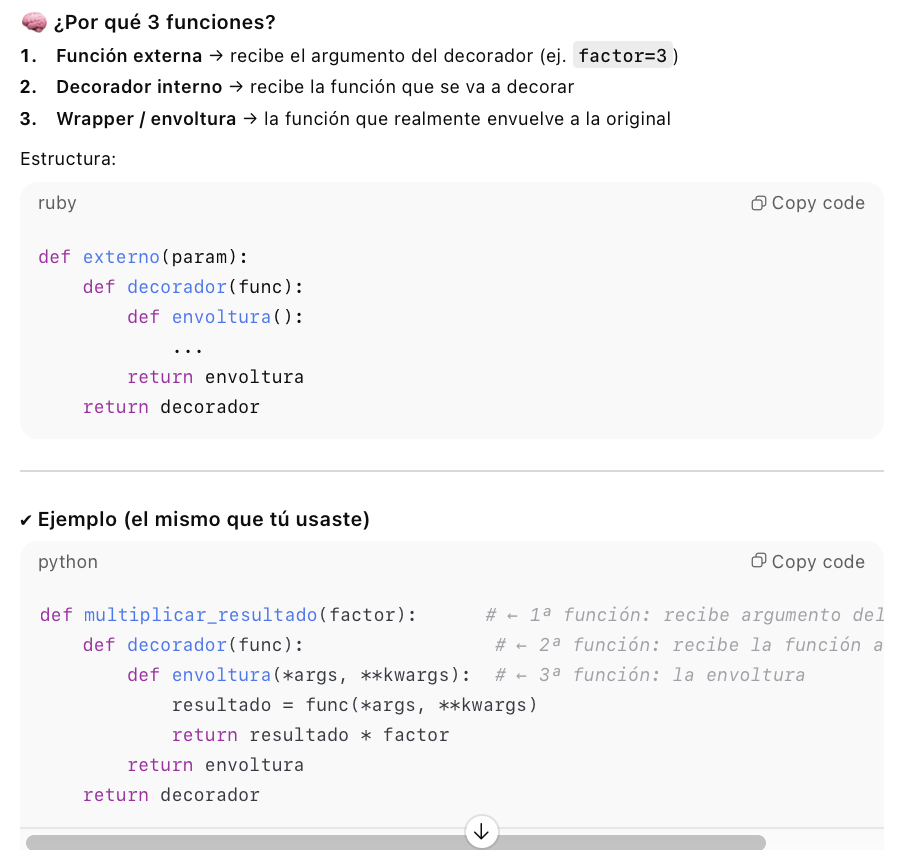

**MÁS EJEMPLOS**

**Ejercicio 1:**

Crea un decorador llamado mayúsculas que:
- Reciba una función
- Ejecute esa función
- Transforme su resultado en mayúsculas
- Devuelva el resultado transformado
    
Después, crea una función decir(texto) que devuelva el texto que le pases, y decórala con mayúsculas.

In [14]:
# Decorador sin argumentos:
def mayusculas(func):
    def envoltura(*args, **kwargs):
        resultado = func(*args, **kwargs)
        return resultado.upper()
    return envoltura

@mayusculas
def decir(texto):
    return texto

In [15]:
print(decir("hola mundo!"))

HOLA MUNDO!


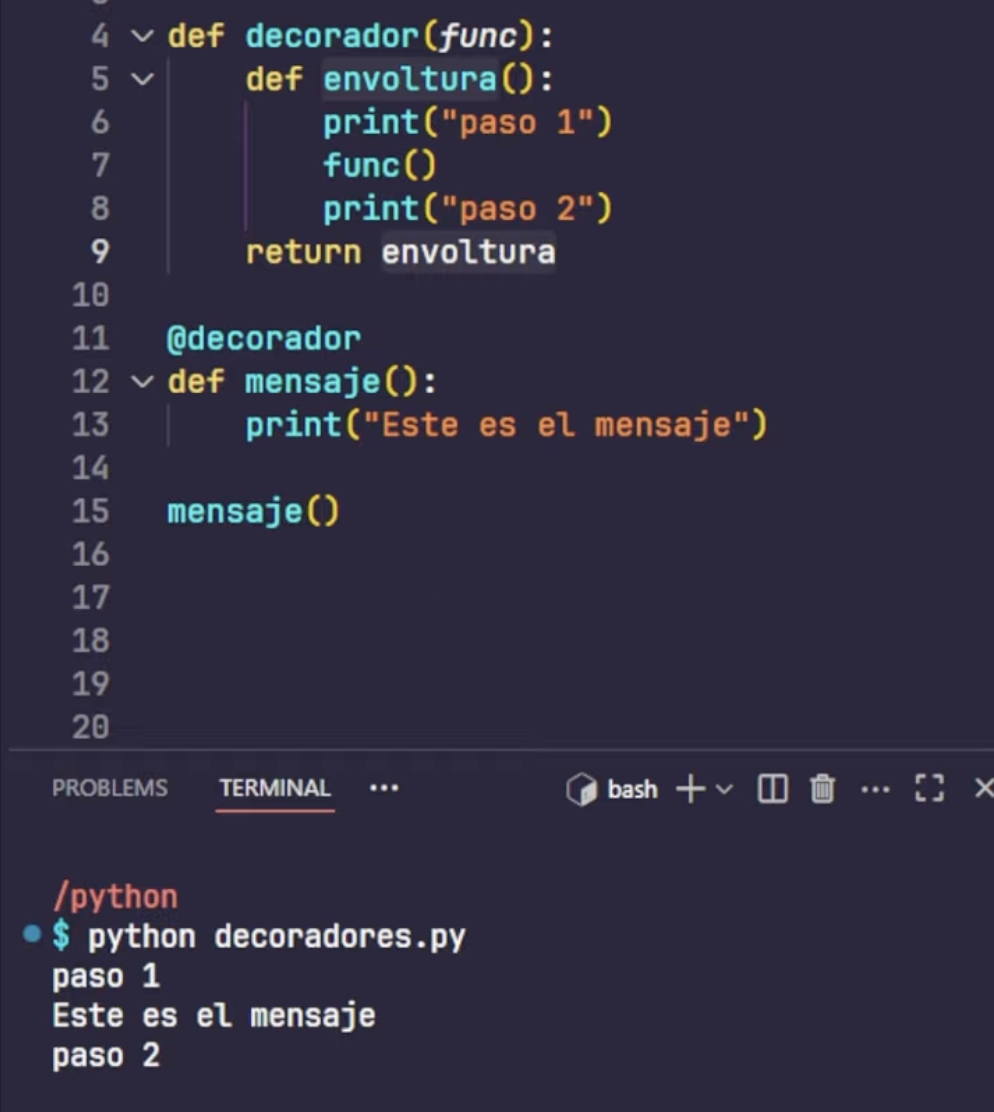

In [16]:
def anunciar(func):
    def envoltura():
        print(f"Ejecutando función: {func.__name__}")
        resultado = func()
        return resultado
    return envoltura

@anunciar
def saludar(): # saludar() en realidad está llamando a envoltura
    return "Hola!"

saludar()


Ejecutando función: saludar


'Hola!'

In [17]:
# Ejercicio 2. Decorador que repite la salida dos veces.

def repetir(func):
    def envoltura(*args, **kwargs): # acepta lo que venga
        resultado = func(*args, **kwargs) # debemos pasarle a func() los mismos parámetros que la función decorada. Lo
        # pasa a la función original. Esta línea de "func(*args, **kwargs)" es realmente "decir(*args= 'Hey')", que 
        # devuelve "Hey"
        return resultado * 2 # devuelve el resultado * 2
    return envoltura

@repetir
def decir(texto): # el @repetir delante convierte "decir(texto)" en repetir(decir) y repetir apunta a "envoltura"
    return texto

decir("Hey") # realmente hacemos "envoltura("Hey")"

'HeyHey'

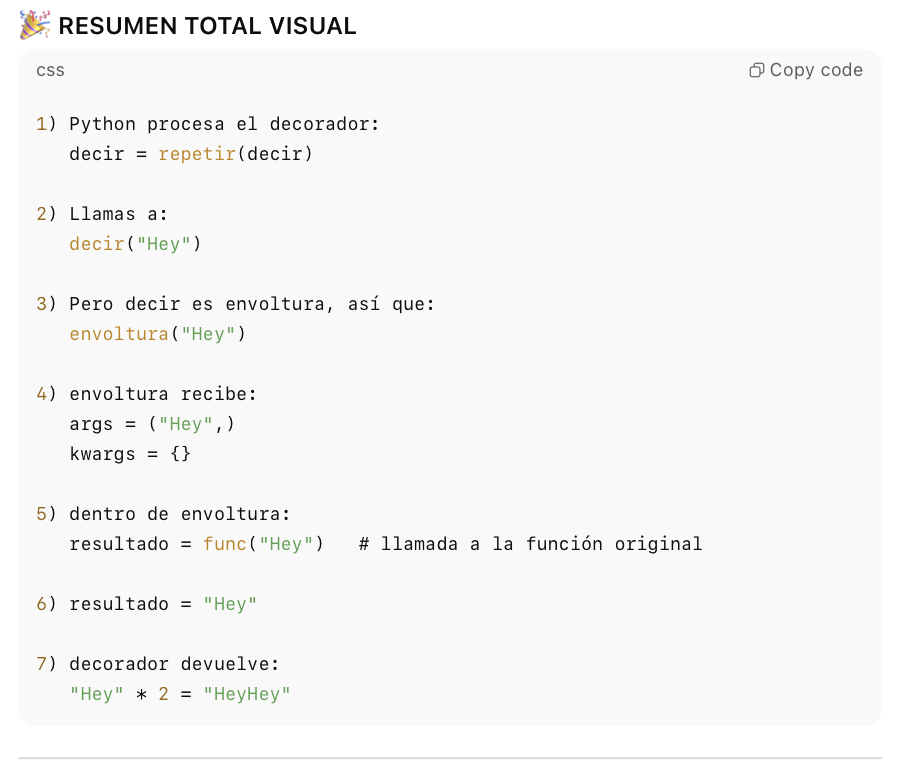

In [18]:
# Ejercicio 3. Decorador que mide el tiempo sin usar argumentos y aplicarlo sobre la función "contar()"

import time

def medir(func):
    def envoltura(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        print(f"Tiempo transcurrido: {fin - inicio} segs.")
        return (resultado)
    return envoltura

@medir
def contar():
    suma = 0
    for i in range(1000000):
        suma += i
    return suma

resultado = contar()
print("Resultado de contar():", resultado)

Tiempo transcurrido: 0.05460023880004883 segs.
Resultado de contar(): 499999500000


In [19]:
# Ejercicio 4. Decorador que convierte el resultado en una lista

def a_lista(func):
    def envoltura(*args, **kwargs):
        resultado = func(*args, **kwargs)
        return [resultado]
    return envoltura

@a_lista
def obtener_numero():
    return 5

resultado = obtener_numero()
print("Resultado de obtener_numero():", resultado)

Resultado de obtener_numero(): [5]


In [20]:
type(resultado)

list

**DECORADORES CON ARGUMENTOS**

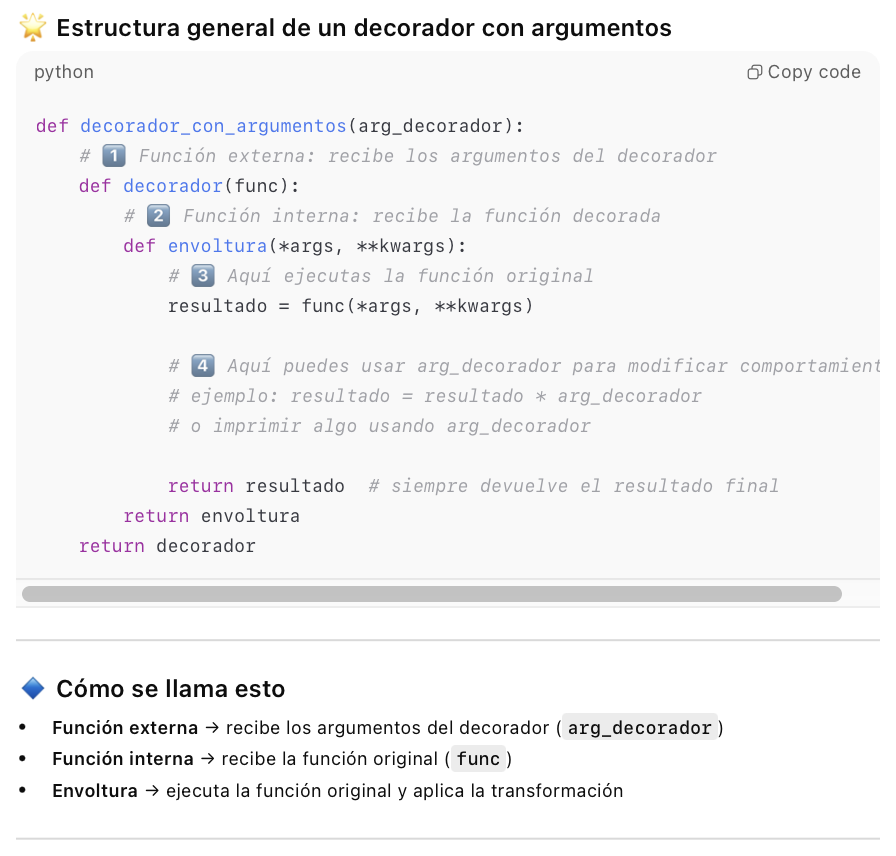

In [21]:
# Ejercicio 1: Repetir la función n veces

def repetir_veces(n):
    def decorador(func):
        def envoltura(*args, **kwargs):
            resultado = func(*args, **kwargs) * n
            return resultado
        return envoltura
    return decorador
        
@repetir_veces(3)
def saludar():
    return("Hola! \n")

print(saludar())

Hola! 
Hola! 
Hola! 



In [22]:
# Ejercicio 2: Multiplicar el resultado por un factor

def multiplicar(factor):
    def decorador(func):
        def envoltura(*args, **kwargs):
            resultado = func(*args, **kwargs) * factor
            return resultado
        return envoltura
    return decorador

@multiplicar(5)
def numero():
    return 5

resultado_multiplicado = numero()
print(resultado_multiplicado)

25


In [23]:
# Ejercicio 3. Imprimir mensaje personalizado antes de ejecutar la función.

def mensaje_personalizado(texto):
    def decorador(func):
        def envoltura(*args, **kwargs):
            print(texto)
            resultado = func(*args, **kwargs)
            return resultado
        return envoltura
    return decorador

@mensaje_personalizado("🚀 Ejecutando función")
def suma(a, b):
    return a + b

res = suma(2,3)
print("El resultado de la suma es", res)

🚀 Ejecutando función
El resultado de la suma es 5


In [24]:
# Ejemplo con texto personalizado:

def mensaje_personalizado(func):
    def envoltura(*args, **kwargs):
        texto = input("Introduce el mensaje que quieres que aparezca: ")
        print(texto)
        resultado = func(*args, **kwargs)
        return resultado
    return envoltura

@mensaje_personalizado
def suma(a, b):
    return a + b

res = suma(2, 3)
print("El resultado de la suma es", res)

hola
El resultado de la suma es 5


In [25]:
# Ejercicio 4. Limitar el número de ejecuciones de una función

def limitar_ejecuciones(max_ejecuciones):
    def decorador(func):
        contador = 0
        def envoltura(*args, **kwargs):
            # en este nivel es donde se hacen las llamadas a la función decorada (sumar())
            nonlocal contador
            if contador < max_ejecuciones:
                resultado = func(*args, **kwargs)
                contador += 1
                return resultado
            else:
                return "Se ha alcanzado el número máximo de ejecuciones"
        return envoltura # este nivel se ejecuta al crear la función
    return decorador

@limitar_ejecuciones(2)
def suma(a, b):
    return a + b

print(suma(1, 4))
print(suma(1, 4))
print(suma(1, 4))
print(suma(1, 4))
print(suma(1, 4))

5
5
Se ha alcanzado el número máximo de ejecuciones
Se ha alcanzado el número máximo de ejecuciones
Se ha alcanzado el número máximo de ejecuciones


- Si ponemos contador dentro de "envoltura" su valor se reinicia a 0 en cada llamada. Cada vez que llamamos a "suma", el contador vuelve a empezar y no bloquea nada.
- Hay que usar una variable persistente que guarde su valor cuando llamamos a la función envoltura

In [26]:
def decorador(func):
    def envoltura(*args, **kwargs):
        envoltura.x += 1
        print("x =", envoltura.x)
        return func(*args, **kwargs)
    
    envoltura.x = 0   # atributo de la función asignado una sola vez. s
    return envoltura

@decorador
def hola():
    print("Hola")

hola()  # x = 1
hola()  # x = 2
hola()  # x = 3

x = 1
Hola
x = 2
Hola
x = 3
Hola


Al atributo de una función se puede acceder desde fuera y desde dentro porque forma parte del objeto función, no del cuerpo interno.
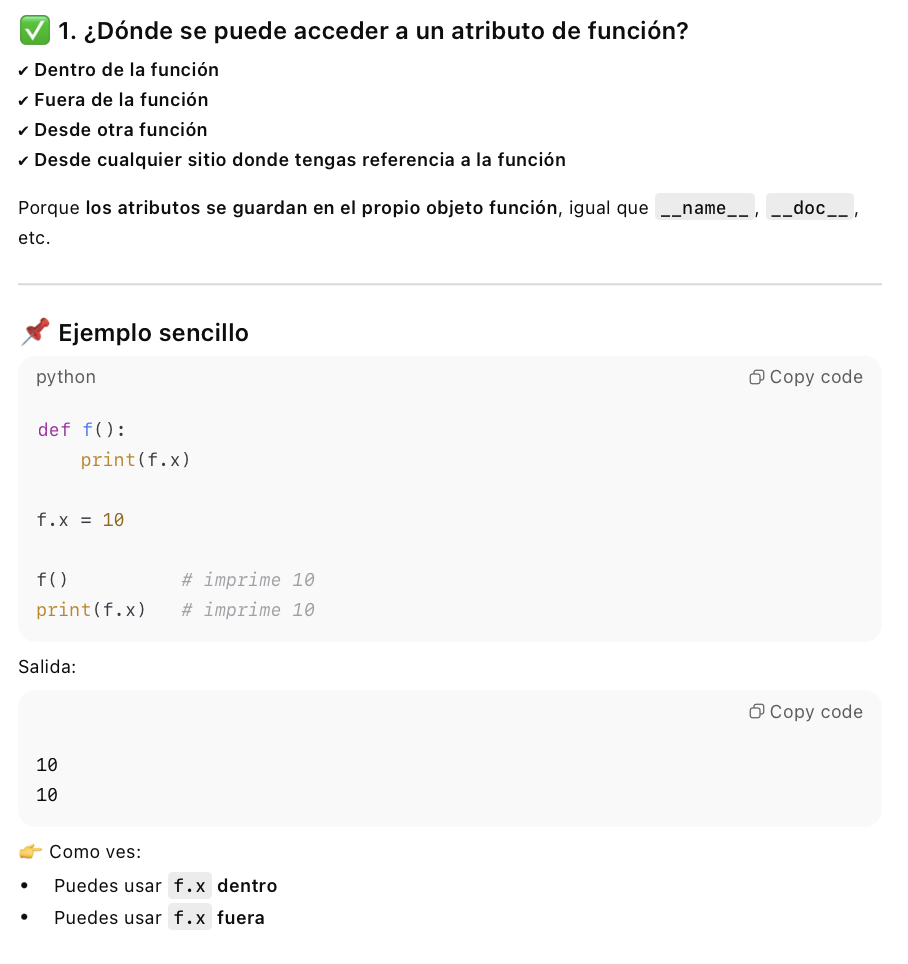

---
## 5️⃣ Decoradores con parámetros

Para pasar argumentos al decorador, se **anida una función adicional**.

### �� Ejercicio 3 — Decorador con nivel de log
Crea un decorador `log_nivel(nivel)` que permita especificar el nivel de log al aplicarlo, por ejemplo:
```python
@log_nivel('INFO')
def procesar():
    pass
```
Debe imprimir algo como: `INFO: ejecutando procesar()`

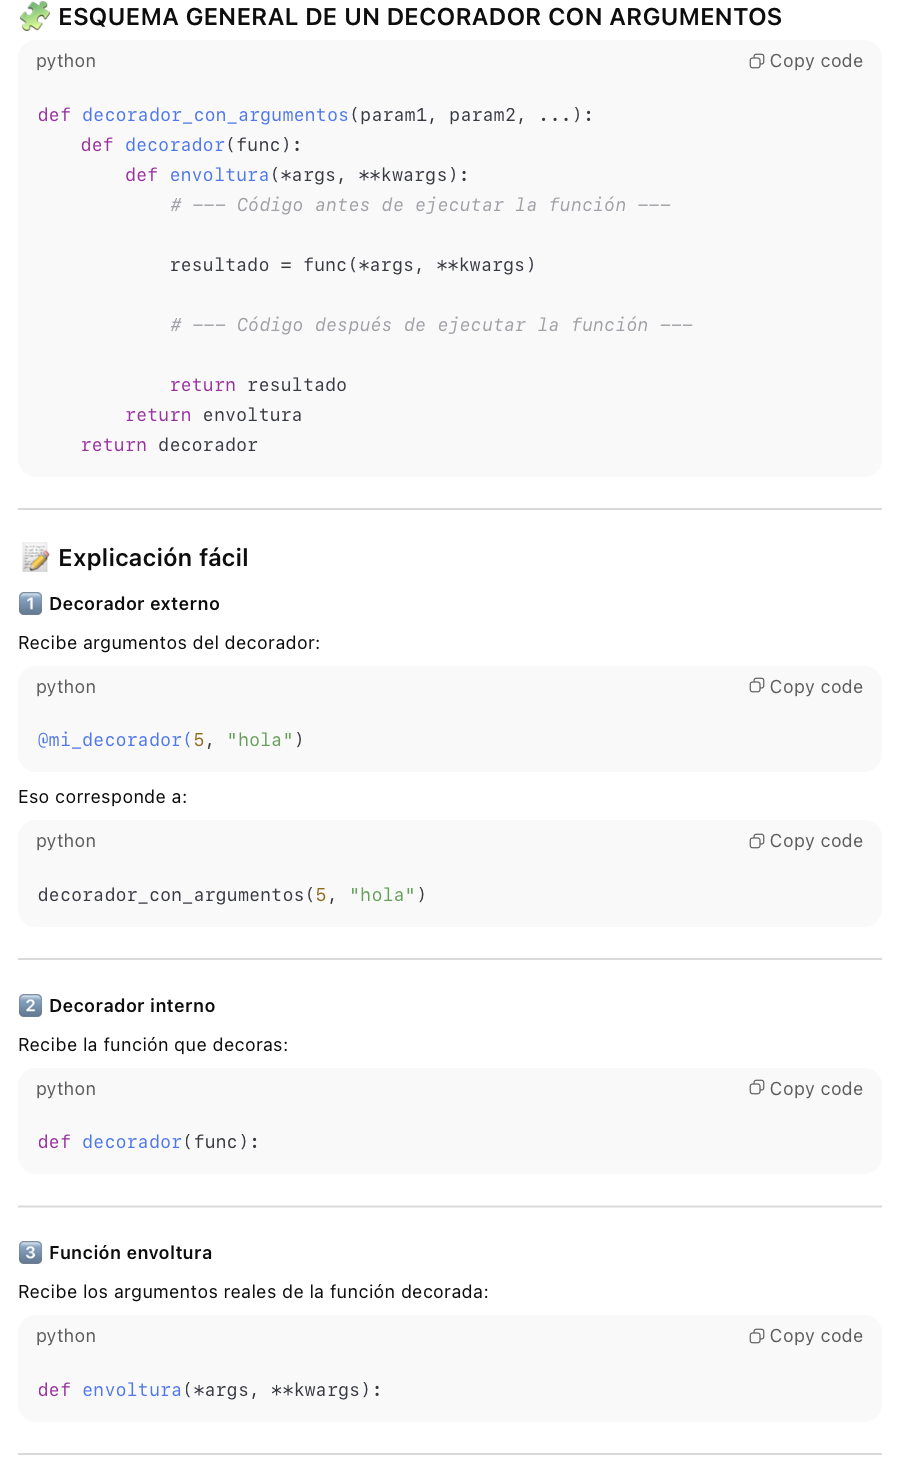

In [27]:
# PLANTILLA PARA DECORADORES CON PARÁMETROS

def decorador_con_argumento(x):

    def decorador(func):

        def envoltura(*args, **kwargs):

            print("Ejecutando", func.__name__, 
                  "con argumento del decorador =", x)

            resultado = func(*args, **kwargs)

            return resultado

        return envoltura

    return decorador


In [35]:
def log_nivel(nivel):
    def decorador(func):
        def envoltura(*args, **kwargs):
            print(nivel + ": ejecutando la función", func.__name__ + "()")
            resultado = func(*args, **kwargs)
            return resultado
        return envoltura
    return decorador

In [36]:
@log_nivel('INFO')
def procesar():
    pass

print(procesar())

INFO: ejecutando la función procesar()
None


In [37]:
# �� Pista: anida una función que reciba func dentro de otra que reciba nivel.

def log_nivel(nivel):
    def decorador(func):
        def wrapper(*args, **kwargs):
            print(f'{nivel}: ejecutando {func.__name__}')
            resultado = func(*args, **kwargs)
            return resultado
        return wrapper
    return decorador
        
@log_nivel('INFO')
def soylafuncionadecorar(v,e,x):
    print(v,e,x)
    # el log no se implementa en la funcion ... lo inyecta el decorador


soylafuncionadecorar(1, 2, 3)
soylafuncionadecorar(2,3,5)
soylafuncionadecorar(3,5,3)



INFO: ejecutando soylafuncionadecorar
1 2 3
INFO: ejecutando soylafuncionadecorar
2 3 5
INFO: ejecutando soylafuncionadecorar
3 5 3


### ✅ Solución propuesta

In [38]:
def log_nivel(nivel):
    def decorador(func):
        def envoltura(*args, **kwargs):
            print(f'{nivel}: ejecutando {func.__name__}')
            return func(*args, **kwargs)
        return envoltura
    return decorador

@log_nivel('INFO')
def procesar():
    print('Procesando datos...')

procesar()

INFO: ejecutando procesar
Procesando datos...


✅ Este patrón es el que usan frameworks como **Flask**, **FastAPI** o **pytest** para manejar rutas, logs o hooks.

---
## 6️⃣ Ejercicio 4 — Encadenar decoradores

Aplica varios decoradores sobre una misma función (`@logger` y `@medir_tiempo`) y observa el orden de ejecución.

💡 *Pista:* el decorador más cercano a la función se ejecuta primero.

In [40]:
# Escribe aquí tu prueba con decoradores encadenados.

@logger
@medir_tiempo
def procesar():
    print("procesando...")

print(procesar())

📘 Ejecutando envoltura con args=(), kwargs={}
procesando...
⏱ Tiempo: 0.00002 segundos
✅ Resultado: None
None


### ✅ Solución propuesta

In [41]:
# @logger
@medir_tiempo
def sumar_lento(a, b):
    time.sleep(0.5)
    return a + b

sumar_lento(3, 7)

sumar_lento(10,39)

⏱ Tiempo: 0.50009 segundos
⏱ Tiempo: 0.50008 segundos


49

✅ Los decoradores se ejecutan en **orden inverso** al que aparecen: el más cercano a la función se aplica primero.

In [42]:
frutas = ['manzana', 'pera']
decoradas = [f"🍎 {f}" for f in frutas]

print(decoradas)


['🍎 manzana', '🍎 pera']


---
## 🧠 Resumen del notebook

- Los **closures** permiten crear funciones con memoria interna.
- Los **decoradores** envuelven funciones para añadir comportamiento.
- Se pueden encadenar y parametrizar.
- Son una herramienta fundamental en frameworks modernos de Python.

💡 Próximo paso → **3.4 – Laboratorio de Funciones y Decoradores Aplicados.**